### Author: Ramim Tarafdar

Assignment 2

2/27/24

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from mpl_toolkits import mplot3d
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

Load the Iris dataset and preprocess the data to make it easier to work with proper labels.

In [2]:
df = pd.read_csv('iris.csv', 
                   header = None, 
                   names=["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)", "species"])

iris = df.replace(["Iris-setosa", "Iris-versicolor", "Iris-virginica"],
                  [0, 1, 2])

iris.head()

C:\Users\rtara\AppData\Local\Temp\ipykernel_8544\100579675.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  iris = df.replace(["Iris-setosa", "Iris-versicolor", "Iris-virginica"],


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Create a list of combinations that meet the requirements of the assignment, utlizing two, three and all features available.

In [3]:
combinations = [
    {'2 Features A': ['sepal length (cm)', 'petal length (cm)']},
    {'2 Features B': ['sepal width (cm)', 'petal width (cm)']},
    {'3 Features': ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']},
    {'4 Features': ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']}
]

Train and fit the models using the four loss functions and appened the accuracy results in a list for plotting. Print the results grouped by the combinations and corresponding loss function.

In [47]:
results = []

lossfn = ['hinge','perceptron','log_loss','modified_huber']

for comb in combinations:
    for label, features in comb.items():
        XX = iris[features].values
        YY = iris['species'].values
        
        print(label)
        for lfn in lossfn:
            clf = SGDClassifier(lfn ,tol=1e-4, random_state=0)
            clf.fit(XX, YY)
            accuracy = clf.score(XX, YY)
            print(f"{lfn}: {accuracy:.4f}")
            results.append({'Combination': label, 'Loss Function': lfn, 'Accuracy':accuracy})
        print('\n')



2 Features A
hinge: 0.8800
perceptron: 0.6133
log_loss: 0.9733
modified_huber: 0.6800


2 Features B
hinge: 0.8933
perceptron: 0.8667
log_loss: 0.9533
modified_huber: 0.9467


3 Features
hinge: 0.6733
perceptron: 0.7067
log_loss: 0.8267
modified_huber: 0.6200


4 Features
hinge: 0.9133
perceptron: 0.9267
log_loss: 0.6800
modified_huber: 0.8667




Plot the results onto bar graphs to analyze effectiveness and accuracy between the functions across the four combinations.

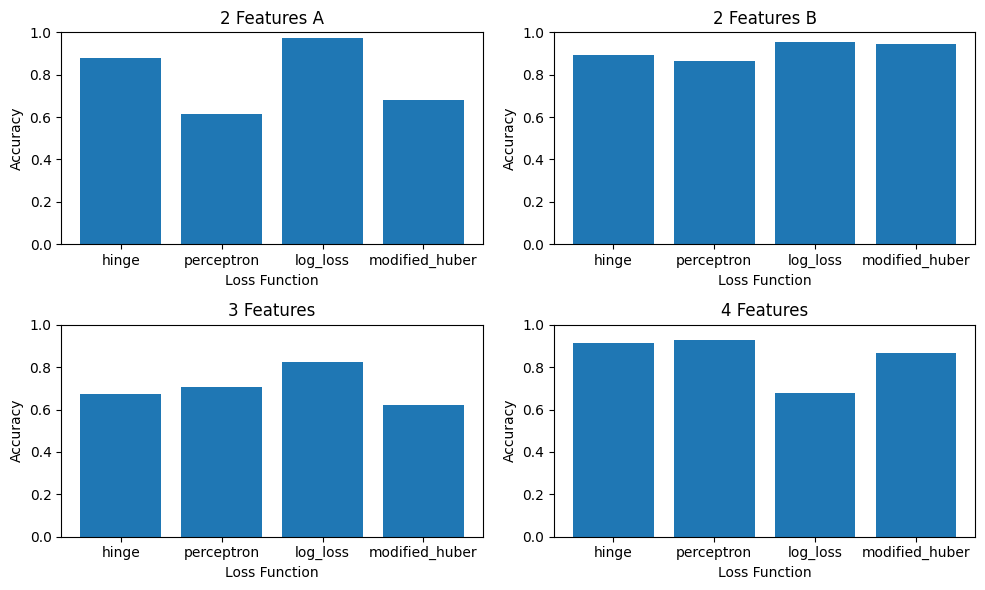

In [5]:
results_df = pd.DataFrame(results)

plt.figure(figsize=(10, 6))
for i, (label, data) in enumerate(results_df.groupby('Combination')):
    plt.subplot(2, 2, i+1)
    plt.bar(data['Loss Function'], data['Accuracy'])
    plt.title(label)
    plt.xlabel('Loss Function')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)

plt.tight_layout()
plt.show()

CONCLUSIONS

The purpose of our assignment was to assess how well different loss functions and feature combinations performed on a model that was trained using the Iris dataset, which included 150 samples from three different flower species (Setora, Versicolor, and Virginica).  From the results, we can observe the variations in accuracies across combinations and loss functions visually on graphs.

Among the four combinations used for this specific model, using all four features (sepal length, sepal width, petal length, and petal width) produced higher accuracies across the loss functions for than smaller combinations. This implies that improved classifications may result from training models on huge datasets. However, the unique combination of sepal width and petal width (2 Features B) also performed extremely well, suggesting that certain features or combinations can result in greater results on their own.

Looking at the loss functions, we notice that the log_loss and hinge functions generally performed better than the perceptron or modified_huber. In particular, the log_loss functionconsistently outperformed the others when it came to two and three features, which indicates its effectiveness on this model. However, there was also a variation observed where the log_loss underperformed significantly when tested on the four feature combination. This goes to show the importance of selecting the proper loss function depending on the size of your training dataset.

To conclude, our findings highlight the importance of variable and loss function consideration when building classification models. Some functions outperform others but have certain drawbacks in specific conditions, which must be considered for each model. There may also be the need for additional parameters to be set in order to ensure greater accuracy and consistency. 